In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np
import superpixel_analysis as sup
import util_plot

from skimage import io

In [60]:
trial = 'PCL-IVQ32-S2-FOV1'

mov = io.imread('../Cohen in vivo/data/' + trial + '/denoised.tif')
# mov_notr = io.imread('../trefide/data/invivo_PMD_notr.tif')
# mov_noblood = io.imread('../trefide/data/invivo_noblood.tif').transpose(1,2,0)

# mov_noblood.shape

## if input is whole data mov

In [69]:
start = time.time()

# rlt=sup.axon_pipeline_Y(mov, cut_off_point=[0.9], length_cut=[10], th=[2], pass_num=1,
#                     residual_cut = [0.6], corr_th_fix=0.7, max_allow_neuron_size=0.1,
#                     merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, patch_size=[60,100],
#                     plot_en=False, TF=False, fudge_factor=1, text=True, bg=False,
#                     max_iter=35, max_iter_fin=50, update_after=4)
# rlt=sup.axon_pipeline_Y(mov, cut_off_point = [0.8], length_cut = [50], 
#                         bg = 1, patch_size=[60,60], residual_cut = [0.43])

# rlt=sup.axon_pipeline_Y(mov, cut_off_point = [0.8], length_cut = [100], 
#                         bg = False, patch_size=[150,150], residual_cut = [0.6], corr_th_fix=0.7)

rlt=sup.axon_pipeline_Y(mov, cut_off_point = [0.9], length_cut = [50], 
                        bg = 2, patch_size=[100,100], residual_cut = [0.43], corr_th_fix=0.7, sup_only=True)

# rlt=sup.axon_pipeline_Y(mov, cut_off_point = [0.9], length_cut = [50], 
#                         bg = False, patch_size=[100,100], residual_cut = [0.43], corr_th_fix=0.7, sup_only)

# rlt_notr=sup.axon_pipeline_Y(mov_notr, cut_off_point=[0.9], length_cut=[10], th=[2], pass_num=1,
#                     residual_cut = [0.6], corr_th_fix=0.5, max_allow_neuron_size=0.1,
#                     merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, patch_size=[60,100],
#                     plot_en=False, TF=False, fudge_factor=1, text=True, bg=False,
#                     max_iter=35, max_iter_fin=50, update_after=4)

# default params
# rlt_notr=sup.axon_pipeline_Y(mov_notr, cut_off_point = [0.9587], length_cut = [150], 
#                              bg = 2, patch_size=[60,60], residual_cut = [0.28])

# rlt_noblood=sup.axon_pipeline_Y(mov_noblood, cut_off_point=[0.9], length_cut=[10], th=[2], pass_num=1,
#                     residual_cut = [0.6], corr_th_fix=0.5, max_allow_neuron_size=0.1,
#                     merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, patch_size=[60,100],
#                     plot_en=False, TF=False, fudge_factor=1, text=True, bg=False,
#                     max_iter=35, max_iter_fin=50, update_after=4)

# rlt_noblood=sup.axon_pipeline_Y(mov_noblood, cut_off_point = [0.9587], length_cut = [150], 
#                                 bg = 1, patch_size=[60,60], residual_cut = [0.28])

print("Demixing took: " + str(time.time()-start)+" sec")

start 1 pass!
find superpixels!
9.778686761856079
rank 1 svd!
25.391844272613525
find pure superpixels!
0.12698578834533691
prepare iteration!
1.8507225513458252
18.997276782989502
Demixing took: 74.91340827941895 sec


In [70]:
# rlt = np.load('../Cohen in vivo/data/' + trial + '/demixed.npy')

# rlt = rlt.item()

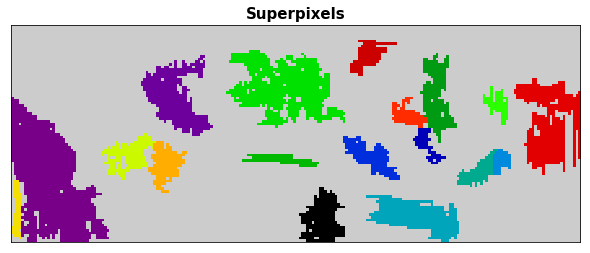

In [71]:
z = sup.superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                           np.arange(np.amax(rlt["superpixel_rlt"][0]["connect_mat_1"])-1),
                           rlt["superpixel_rlt"][0]["brightness_rank"],
                           text=False)

# z = sup.superpixel_single_plot(rlt_notr["superpixel_rlt"][0]["connect_mat_1"],
#                            np.arange(np.amax(rlt_notr["superpixel_rlt"][0]["connect_mat_1"])-1),
#                            rlt_notr["superpixel_rlt"][0]["brightness_rank"],
#                            text=False)

# io.imsave('../Cohen in vivo/data/superpixels.tif',rlt_notr["superpixel_rlt"][0]["connect_mat_1"])

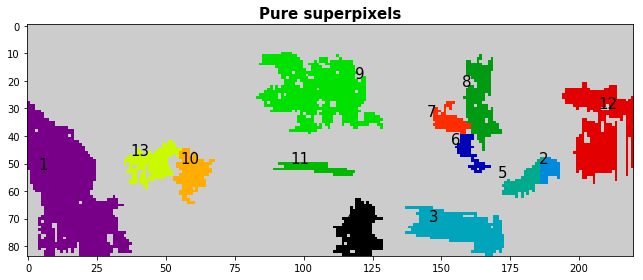

In [72]:
# plt.figure(figsize=(9.75,10))
# io.imshow(np.amax(mov, 2),cmap='jet')
sup.pure_superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                                rlt["superpixel_rlt"][0]["pure_pix"],
                                rlt["superpixel_rlt"][0]["brightness_rank"],text=True);

# sup.pure_superpixel_single_plot(rlt_notr["superpixel_rlt"][0]["connect_mat_1"],
#                                 rlt_notr["superpixel_rlt"][0]["pure_pix"],
#                                 rlt_notr["superpixel_rlt"][0]["brightness_rank"],text=True);

# sup.pure_superpixel_single_plot(rlt_noblood["superpixel_rlt"][0]["connect_mat_1"],
#                                 rlt_noblood["superpixel_rlt"][0]["pure_pix"],
#                                 rlt_noblood["superpixel_rlt"][0]["brightness_rank"],text=True);

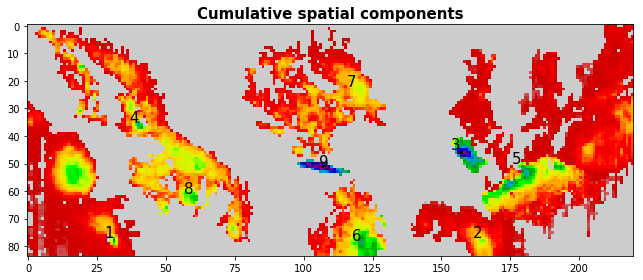

In [64]:
sup.spatial_sum_plot_single((rlt["fin_rlt"]["a"]),mov.shape[:2],text=True);

# sup.spatial_sum_plot_single((rlt_notr["fin_rlt"]["a"]),mov_notr.shape[:2],text=True);

# sup.spatial_sum_plot_single((rlt_noblood["fin_rlt"]["a"]),mov_noblood.shape[:2],text=True);

In [42]:
# np.save('../Cohen in vivo/data/' + trial + '/demixed.npy',rlt)

# Yd = mov_notr
# Yd_min = Yd.min()
# if Yd_min < 0:
#     Yd_min_pw = Yd.min(axis=2, keepdims=True);
#     Yd -= Yd_min_pw;
# Yt = sup.threshold_data(Yd, th=1);
# io.imshow(Yd[:,:,2000])
# io.imsave('../Cohen in vivo/data/invivo_thresholded.tif',Yt)

# rlt_old=np.load('../Cohen in vivo/data/' + 'PCL-IVQ32-S2-FOV2' + '/demixed.npy')



/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


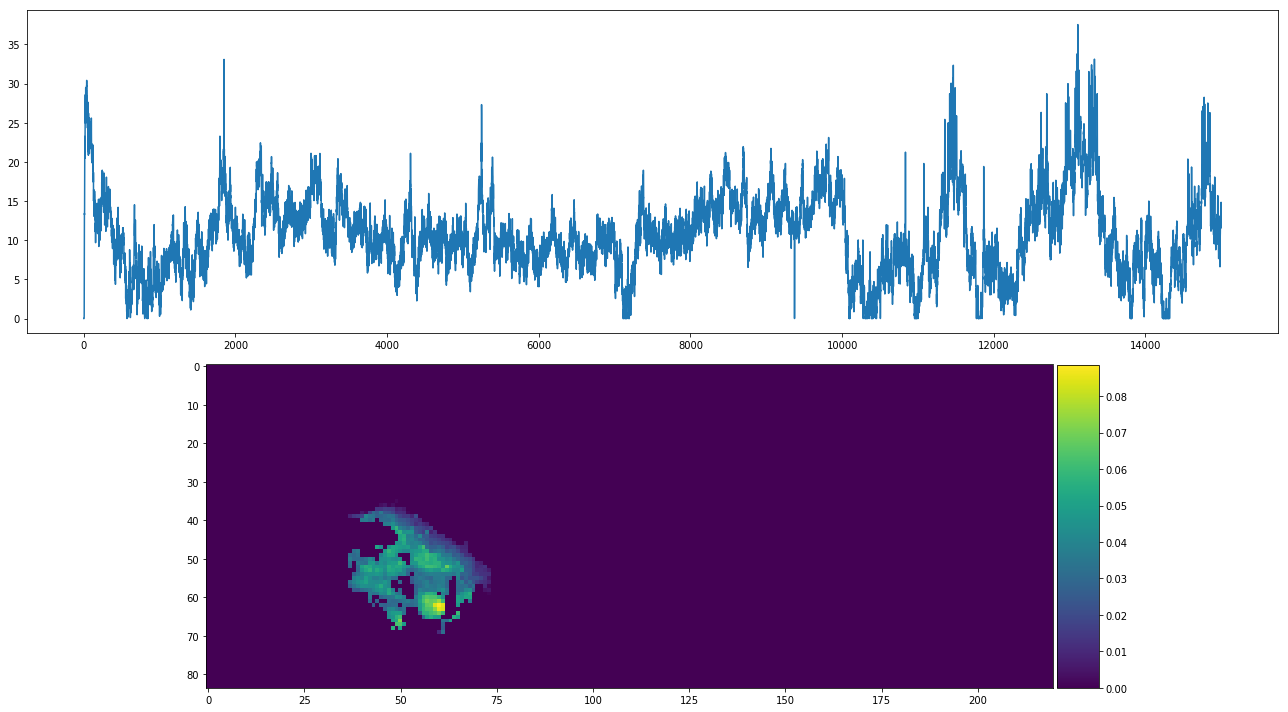

In [54]:
cell_num = 8
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.plot(rlt["fin_rlt"]["c"][:,cell_num-1])
plt.subplot(2,1,2)
io.imshow(rlt["fin_rlt"]["a"][:,cell_num-1].reshape(mov.shape[1],mov.shape[0]).transpose(1,0))

# cell_num = 3
# plt.figure(figsize=(18,10))
# plt.subplot(2,1,1)
# plt.plot(rlt_notr["fin_rlt"]["c"][:,cell_num-1])
# plt.subplot(2,1,2)
# io.imshow(rlt_notr["fin_rlt"]["a"][:,cell_num-1].reshape(270,84).transpose(1,0))

# cell_num = 4
# plt.figure(figsize=(18,10))
# plt.subplot(2,1,1)
# plt.plot(rlt_noblood["fin_rlt"]["c"][6000:6500,cell_num-1])
# plt.subplot(2,1,2)
# io.imshow(rlt_noblood["fin_rlt"]["a"][:,cell_num-1].reshape(270,84).transpose(1,0))

/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


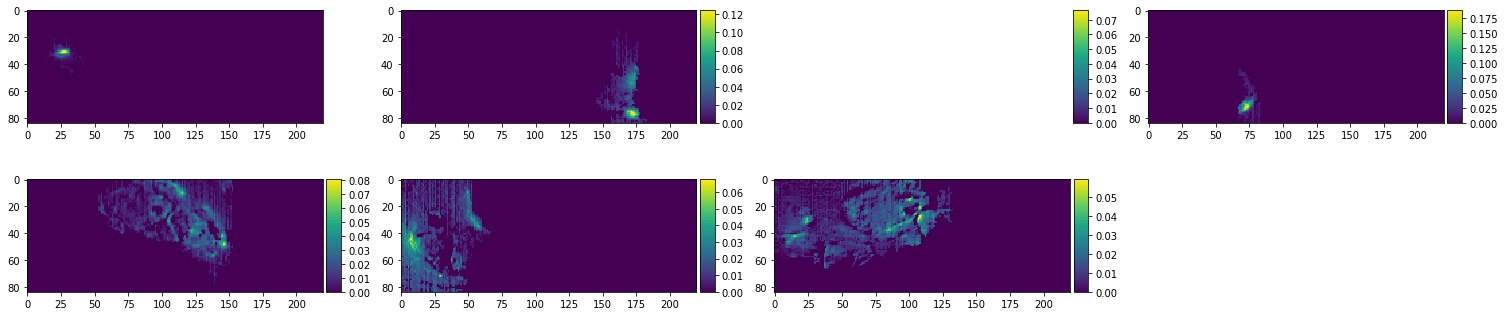

In [51]:
plt.figure(figsize=(21,5))

for cell_num in np.arange(1,rlt["fin_rlt"]["a"].shape[1]+1):
    plt.subplot(2,4,cell_num)
    io.imshow(rlt["fin_rlt"]["a"][:,cell_num-1].reshape(220,84).transpose(1,0))

/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


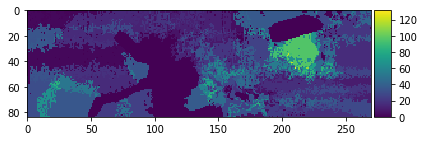

In [24]:
comp = rlt_noblood["fin_rlt"]["a"].copy()
comp[comp != 0] = 1

for i in range(comp.shape[1]):
    comp[:,i] = (comp.shape[1]-i) * comp[:,i]

image = comp.sum(1)

io.imshow(image.reshape(270,84).transpose(1,0))

/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


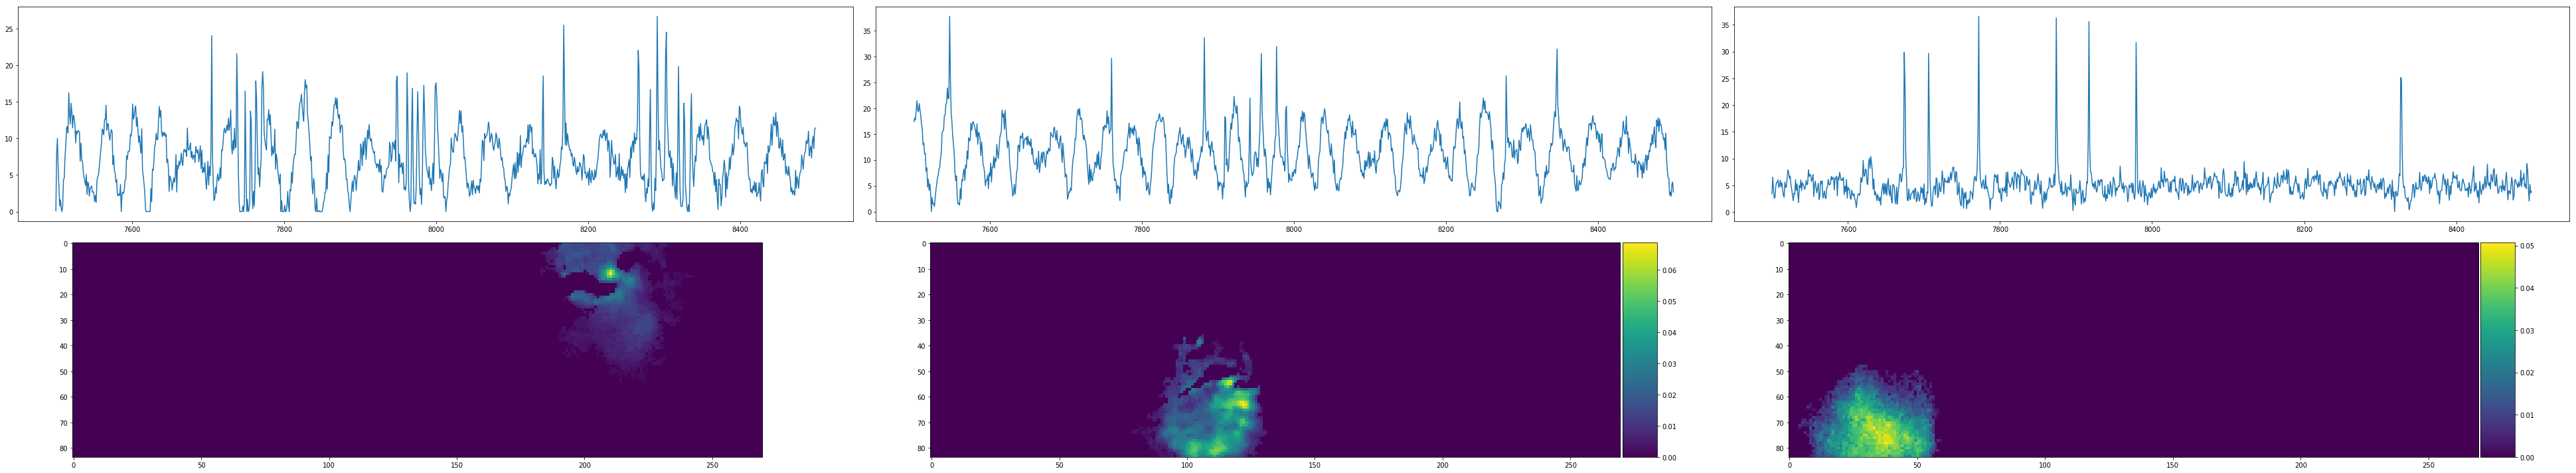

In [28]:
plt.figure(figsize=(54,10))
plt.subplot(2,3,1)
plt.plot(np.arange(7500,8500),rlt_notr["fin_rlt"]["c"][7500:8500,1])
plt.subplot(2,3,2)
plt.plot(np.arange(7500,8500),rlt_notr["fin_rlt"]["c"][7500:8500,3])
plt.subplot(2,3,3)
plt.plot(np.arange(7500,8500),rlt_notr["fin_rlt"]["c"][7500:8500,6])

plt.subplot(2,3,4)
io.imshow(rlt_notr["fin_rlt"]["a"][:,1].reshape(270,84).transpose(1,0))
plt.subplot(2,3,5)
io.imshow(rlt_notr["fin_rlt"]["a"][:,3].reshape(270,84).transpose(1,0))
plt.subplot(2,3,6)
io.imshow(rlt_notr["fin_rlt"]["a"][:,6].reshape(270,84).transpose(1,0))


In [161]:
io.imsave('../trefide/data/mask2.tif',rlt_notr["fin_rlt"]["a"][:,4-1].reshape(270,84).transpose(1,0))

/data/home/michaelxie/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ../trefide/data/mask2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


## if input is U, V -- low rank decomposition of mov

In [ ]:
rlt=sup.axon_pipeline(mov, U, V, cut_off_point=[0.8], length_cut=[10], th=[2], pass_num=1,
                    residual_cut = [0.6], corr_th_fix=0.31, max_allow_neuron_size=0.3,
                    merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, patch_size=[100,100],
                    plot_en=False, TF=True, fudge_factor=1, text=True, bg=False,
                    max_iter=35, max_iter_fin=50, update_after=4)

In [49]:
rlt_notr["superpixel_rlt"][0]["pure_pix"].shape

(43,)